<a href="https://colab.research.google.com/github/momomendoza2476-max/SIMULACI-N-II/blob/main/movimiento_browniano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(45)


In [12]:
def brownian_dyadic(n_max=12):
    """
    Genera una trayectoria de Movimiento Browniano en [0,1]
    sobre la malla diádica más fina 2^{n_max}.
    """
    N = 2**n_max
    dt = 1 / N
    dB = np.sqrt(dt) * np.random.randn(N)
    B = np.concatenate([[0], np.cumsum(dB)])
    t = np.linspace(0, 1, N + 1)
    return t, B


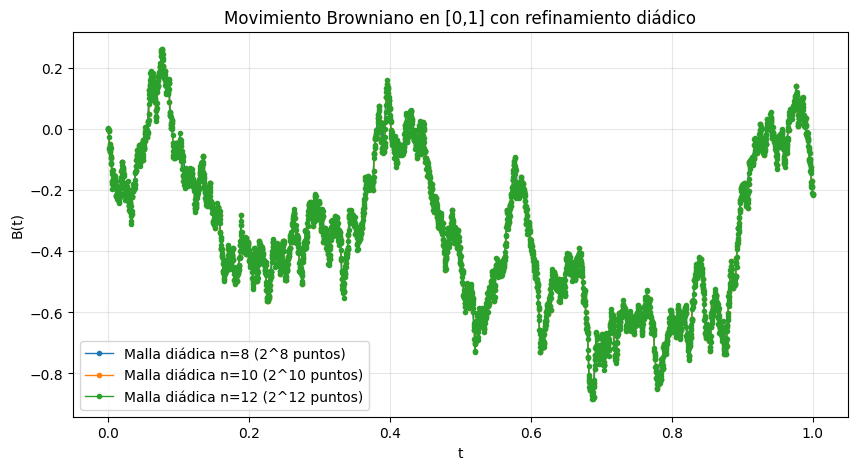

In [13]:
n_max = 12
t_fine, B_fine = brownian_dyadic(n_max)

levels = [8, 10, 12]

plt.figure(figsize=(10,5))

for n in levels:
    step = 2**(n_max - n)
    plt.plot(
        t_fine[::step],
        B_fine[::step],
        marker='o',
        markersize=3,
        linewidth=1,
        label=f"Malla diádica n={n} (2^{n} puntos)"
    )

plt.title("Movimiento Browniano en [0,1] con refinamiento diádico")
plt.xlabel("t")
plt.ylabel("B(t)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


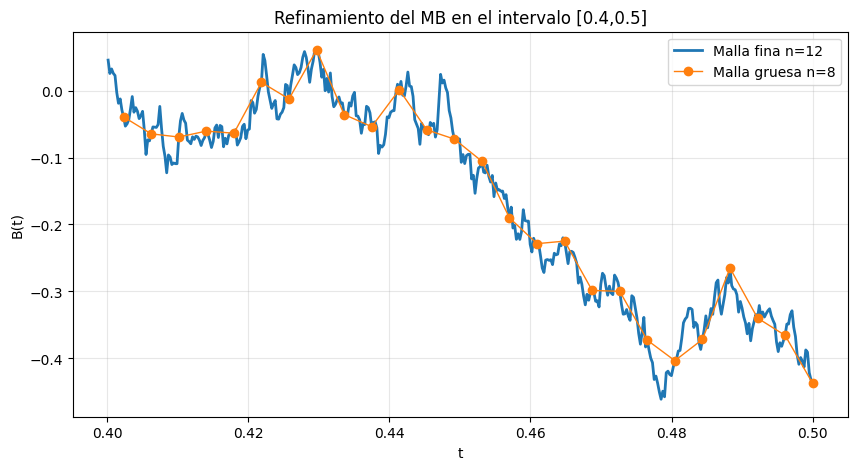

In [14]:
a, b = 0.4, 0.5
mask = (t_fine >= a) & (t_fine <= b)

plt.figure(figsize=(10,5))

plt.plot(
    t_fine[mask],
    B_fine[mask],
    label="Malla fina n=12",
    linewidth=2
)

n = 8
step = 2**(n_max - n)
tN = t_fine[::step]
BN = B_fine[::step]
maskN = (tN >= a) & (tN <= b)

plt.plot(
    tN[maskN],
    BN[maskN],
    marker='o',
    linewidth=1,
    label="Malla gruesa n=8"
)

plt.title(f"Refinamiento del MB en el intervalo [{a},{b}]")
plt.xlabel("t")
plt.ylabel("B(t)")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [15]:
dt = 2**(-n_max)
increments = np.diff(B_fine)

print("Media empírica:", np.mean(increments))
print("Varianza empírica:", np.var(increments))
print("Varianza teórica:", dt)


Media empírica: -5.1529118901582415e-05
Varianza empírica: 0.00024314763520407866
Varianza teórica: 0.000244140625


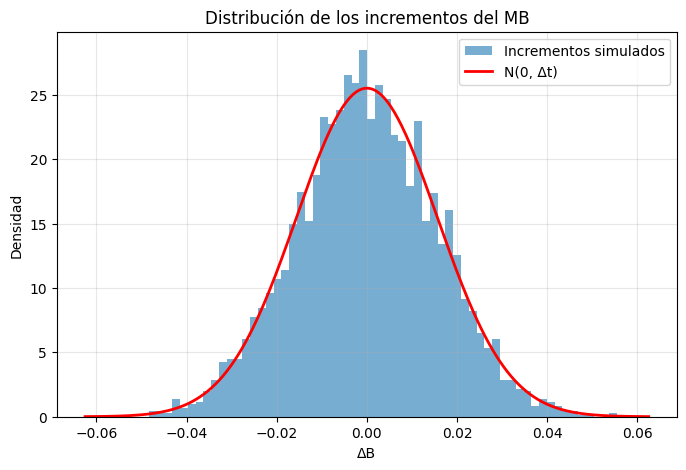

In [16]:
x = np.linspace(-4*np.sqrt(dt), 4*np.sqrt(dt), 300)

plt.figure(figsize=(8,5))
plt.hist(increments, bins=60, density=True, alpha=0.6, label="Incrementos simulados")
plt.plot(x, norm.pdf(x, 0, np.sqrt(dt)), 'r', lw=2, label="N(0, Δt)")
plt.title("Distribución de los incrementos del MB")
plt.xlabel("ΔB")
plt.ylabel("Densidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Se construyó una trayectoria del Movimiento Browniano en el intervalo
[
0
,
1
]
[0,1] usando una malla diádica.
El refinamiento se realizó de manera coherente, preservando la trayectoria original al aumentar la resolución temporal.
Se observó el aumento de irregularidad característico del Movimiento Browniano al refinar la malla.
Finalmente, se verificó que los incrementos siguen una distribución normal con media cero y varianza proporcional al tamaño del paso temporal, confirmando las propiedades teóricas del proceso.